In [49]:
import numpy as np
import pandas as pd
import ruptures as rpt
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df = pd.read_csv('data/clean_data.csv')

In [50]:
signal = df['accuracy_1_%'].values
model = rpt.Pelt(model="rbf", min_size=5).fit(signal)
changes_pelt = model.predict(pen=1)

changes_pelt = [cp for cp in changes_pelt if cp < len(df)]

In [51]:
indexes = [0] + changes_pelt + [len(signal)-1]

p-value > 0.05 → не отвергаем H₀ (нормальность).

p-value ≤ 0.05 → отвергаем H₀ (ненормальность).

In [52]:
for i in range(len(indexes) - 1):
    data = signal[indexes[i]:indexes[i+1]]
    shapiro_test = stats.shapiro(data)

    print(f"[{indexes[i]}, {indexes[i+1]}] - {shapiro_test.pvalue > 0.05}, W = {shapiro_test.statistic:.3f}")


[0, 65] - False, W = 0.928
[65, 140] - True, W = 0.981
[140, 150] - True, W = 0.941
[150, 180] - True, W = 0.931
[180, 195] - True, W = 0.975
[195, 225] - True, W = 0.933
[225, 235] - False, W = 0.746
[235, 240] - True, W = 0.859
[240, 250] - True, W = 0.926
[250, 260] - True, W = 0.868
[260, 265] - True, W = 0.945
[265, 270] - True, W = 0.989
[270, 318] - True, W = 0.973


W - уверенность в результате [0,1]

In [53]:
shapiro_test = stats.shapiro(signal)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

Shapiro-Wilk test: W=0.906, p-value=0.000


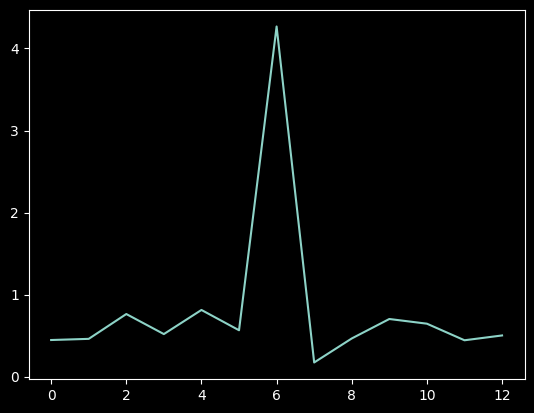

In [54]:
# stds = []
# for i in range(len(indexes) - 1):
#     data = signal[indexes[i]:indexes[i+1]]

#     stds += []

#     #print(f"{data.std():.3f}")

stds = [signal[indexes[i]:indexes[i+1]].std() for i in range(len(indexes) - 1)]

plt.plot(stds)

Тест Уэлча для проверки значимости в различии средних соседних выборок (при различной дисперсии)

Тест Бартлетт для проверки значимости в различии дисперсий соседних выборок

In [57]:
for i in range(len(indexes) - 2):
    data1 = signal[indexes[i]:indexes[i+1]]
    data2 = signal[indexes[i+1]:indexes[i+2]]

    print(f"{indexes[i+1]} \
           - mean: {stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05} \
           - std: {stats.bartlett(data1, data2).pvalue > 0.05} \
           ")

65            - mean: False            - std: True            
140            - mean: False            - std: False            
150            - mean: False            - std: True            
180            - mean: False            - std: False            
195            - mean: False            - std: True            
225            - mean: False            - std: False            
235            - mean: False            - std: False            
240            - mean: False            - std: True            
250            - mean: False            - std: True            
260            - mean: False            - std: True            
265            - mean: False            - std: True            
270            - mean: False            - std: True            
